In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Thay đổi đường dẫn của tệp CSV thành đường dẫn thực tế của bạn
file_path = 'D:/Study/Ma_Nguon_mo/bai_cuoi_ki/data_label_done.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị dữ liệu trong DataFrame
df.head()

,LotShape,LandContour,Utilities,LandSlope,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,3,3,2,CollgCr,7,2003,2003,196,3,...,0,0,0,0,1,0,0,0,1,0
1,3,3,3,2,Veenker,6,1976,1976,0,2,...,0,0,0,0,1,0,0,0,1,0
2,2,3,3,2,CollgCr,7,2001,2002,162,3,...,0,0,0,0,1,0,0,0,1,0
3,2,3,3,2,Crawfor,7,1915,1970,0,2,...,0,0,0,0,1,0,0,0,0,0
4,2,3,3,2,NoRidge,8,2000,2000,350,3,...,0,0,0,0,1,0,0,0,1,0


In [3]:
df.columns

Index(['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=146)

# Chia tập train_test

In [4]:
# Separate features (X) and labels (y)
X = df.drop(['Neighborhood', 'SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

# Tạo một SimpleImputer với chiến lược là 'mean'
imputer = SimpleImputer(strategy='mean')

# Áp dụng Imputer vào dữ liệu
X = imputer.fit_transform(X)

In [5]:
def mixup(X, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    mixup_image = lam * X + (1 - lam) * X[::-1]
    mixup_label = lam * y + (1 - lam) * y[::-1]
    return mixup_image, mixup_label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Áp dụng hàm mixup cho tập huấn luyện
X_train_mixup, y_train_mixup = mixup(X_train, y_train)

# Model Random Forest

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Giả sử bạn có dữ liệu X và nhãn y
# Thay thế X và y bằng dữ liệu thực tế của bạn
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán nhãn trên tập kiểm thử
y_pred = clf.predict(X_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# In báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8517241379310345
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.37      0.51        27
           1       0.87      0.97      0.92       202
           2       0.82      0.71      0.76        52
           3       0.57      0.57      0.57         7
           4       0.00      0.00      0.00         2

    accuracy                           0.85       290
   macro avg       0.62      0.52      0.55       290
weighted avg       0.84      0.85      0.84       290



C:\Users\lamta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lamta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lamta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


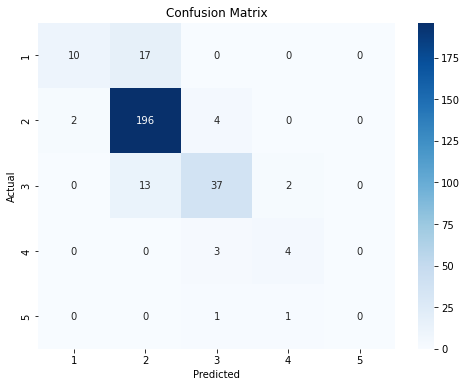

In [11]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = [1,2,3,4,5]
# Hiển thị confusion matrix bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

# Tính Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Tính Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

NameError: name 'model' is not defined

C:\Users\lamta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lamta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lamta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Accuracy: 0.7482758620689656
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.33      0.41        27
           1       0.81      0.89      0.85       202
           2       0.59      0.52      0.55        52
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         2

    accuracy                           0.75       290
   macro avg       0.43      0.38      0.40       290
weighted avg       0.72      0.75      0.73       290



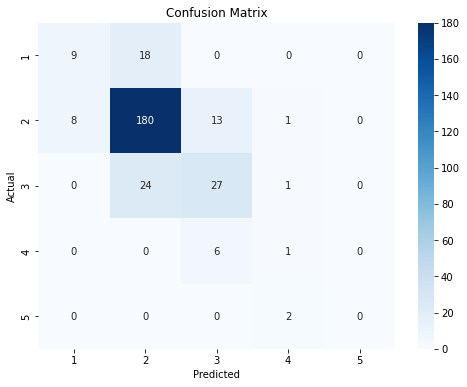

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn có dữ liệu X và nhãn y
# Thay thế X và y bằng dữ liệu thực tế của bạn
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Logistic Regression
clf = LogisticRegression(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán nhãn trên tập kiểm thử
y_pred = clf.predict(X_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# In báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()